In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
%matplotlib inline

In [3]:
reviews = pd.read_csv('yelp_kimos.csv')

In [4]:
reviews = reviews[:-1]
reviews.columns

Index(['date', 'rating', 'review', 'name', 'location', 'rating_v1'], dtype='object')

In [11]:
reviews

,date,rating,review,name,location,rating_v1
0,9/28/2017,4.0 star rating,I really liked their menu set up. Fresh fish ...,Amy E.,"Fremont, CA",4.0 star rating
1,9/19/2017,5.0 star rating,Went for dinner on our 1st night in Maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating
2,9/17/2017,3.0 star rating,Beautiful beachfront restaurant in Lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating
3,8/31/2017,5.0 star rating,One of my My favorite restaurants in Maui wit...,Amber V.,"Las Vegas, NV",4.0 star rating
4,9/22/2017,4.0 star rating,"After lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating
...,...,...,...,...,...,...
2075,10/28/2008,4.0 star rating,"Okay so I used to work here, I'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating
2076,9/17/2009,5.0 star rating,For our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating
2077,2/18/2009,4.0 star rating,Kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating
2078,10/14/2007,5.0 star rating,Lunch. Fish sandwich - Kimo's style (not spic...,Kanani P.,"San Francisco, CA",4.0 star rating


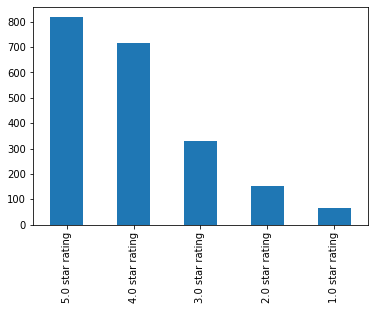

In [12]:
reviews['rating'].value_counts().plot(kind='bar');

In [13]:
reviews['review'] = reviews['review'].astype(str)

In [14]:
reviews['review'].head()

0    I  really liked their menu set up. Fresh fish ...
1    Went for dinner on our 1st night in Maui..my s...
2    Beautiful beachfront restaurant in Lahaina tow...
3    One of my My favorite restaurants in Maui  wit...
4    After lunch, we wanted to go people watch on t...
Name: review, dtype: object

In [24]:
#Lowercasing all the review content to make data normalised and keep words in uniform manner
reviews['review'] = reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [25]:
reviews['review'].head()

0    i really liked their menu set up. fresh fish s...
1    went for dinner on our 1st night in maui..my s...
2    beautiful beachfront restaurant in lahaina tow...
3    one of my my favorite restaurants in maui with...
4    after lunch, we wanted to go people watch on t...
Name: review, dtype: object

In [26]:
#removing special characters: Since these special characters create their own tokens and hence not usefull in any kind of 
#algorithm
reviews['review_new'] = reviews['review'].str.replace('[^\w\s]','')

In [27]:
reviews

,date,rating,review,name,location,rating_v1,review_new
0,9/28/2017,4.0 star rating,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,i really liked their menu set up fresh fish se...
1,9/19/2017,5.0 star rating,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went for dinner on our 1st night in mauimy son...
2,9/17/2017,3.0 star rating,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant in lahaina tow...
3,8/31/2017,5.0 star rating,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one of my my favorite restaurants in maui with...
4,9/22/2017,4.0 star rating,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,after lunch we wanted to go people watch on th...
...,...,...,...,...,...,...,...
2075,10/28/2008,4.0 star rating,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay so i used to work here im completely bias...
2076,9/17/2009,5.0 star rating,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,for our first family trip to the neighbor isla...
2077,2/18/2009,4.0 star rating,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimos has one of the best spots to watch the s...
2078,10/14/2007,5.0 star rating,lunch. fish sandwich - kimo's style (not spicy...,Kanani P.,"San Francisco, CA",4.0 star rating,lunch fish sandwich kimos style not spicy caj...


In [28]:
#removing stopwords from the reviews, because there words have no predictive power in reality
# for example: i, me, myself
stop = stopwords.words('english')
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [29]:
reviews['review_new']

0       really liked menu set fresh fish selection cha...
1       went dinner 1st night mauimy son 15 loves cook...
2       beautiful beachfront restaurant lahaina town b...
3       one favorite restaurants maui view food die ob...
4       lunch wanted go people watch boardwalk later g...
                              ...                        
2075    okay used work im completely biased eaten ever...
2076    first family trip neighbor island maui place m...
2077    kimos one best spots watch sunset lounge area ...
2078    lunch fish sandwich kimos style spicy cajun st...
2079    excellent dinners tasty excellent service mang...
Name: review_new, Length: 2080, dtype: object

In [30]:
#Stemming: helps to gain relevant information as it reduces all words with the same roots to a 
#common form by removing suffixes such as -action, ing, -es and -ses.
#BUT  there can be problematic where there are spelling errors.
st = PorterStemmer()
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [31]:
type(reviews['review_new'])

pandas.core.series.Series

In [32]:
def sentiment(x):
    return TextBlob(x).sentiment  

reviews['review_score'] = reviews['review_new'].apply(sentiment)
#the first score is sentiment polarity which tells if the sentiment is positive or negative 
#and the second score is subjectivity score to tell how subjective is the text
reviews

,date,rating,review,name,location,rating_v1,review_new,review_score
0,9/28/2017,4.0 star rating,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,realli like menu set fresh fish select chang d...,"(0.38522727272727275, 0.5625)"
1,9/19/2017,5.0 star rating,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimi son 15 love cook ...,"(0.6333333333333333, 0.4333333333333333)"
2,9/17/2017,3.0 star rating,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beauti beachfront restaur lahaina town beauti ...,"(0.14487179487179486, 0.5762820512820513)"
3,8/31/2017,5.0 star rating,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorit restaur maui view food die obvious...,"(0.10454545454545455, 0.47500000000000003)"
4,9/22/2017,4.0 star rating,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch want go peopl watch boardwalk later grab...,"(0.31428571428571433, 0.376984126984127)"
...,...,...,...,...,...,...,...,...
2075,10/28/2008,4.0 star rating,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay use work im complet bias eaten everyth me...,"(0.5343915343915344, 0.4856261022927689)"
2076,9/17/2009,5.0 star rating,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first famili trip neighbor island maui place m...,"(0.27329545454545456, 0.50625)"
2077,2/18/2009,4.0 star rating,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimo one best spot watch sunset loung area cre...,"(0.27272727272727276, 0.36515151515151517)"
2078,10/14/2007,5.0 star rating,lunch. fish sandwich - kimo's style (not spicy...,Kanani P.,"San Francisco, CA",4.0 star rating,lunch fish sandwich kimo style spici cajun sty...,"(0.021875000000000006, 0.671875)"


In [33]:
reviews[['polarity', 'subjectivity']] = pd.DataFrame(reviews['review_score'].tolist(), index=reviews.index) 

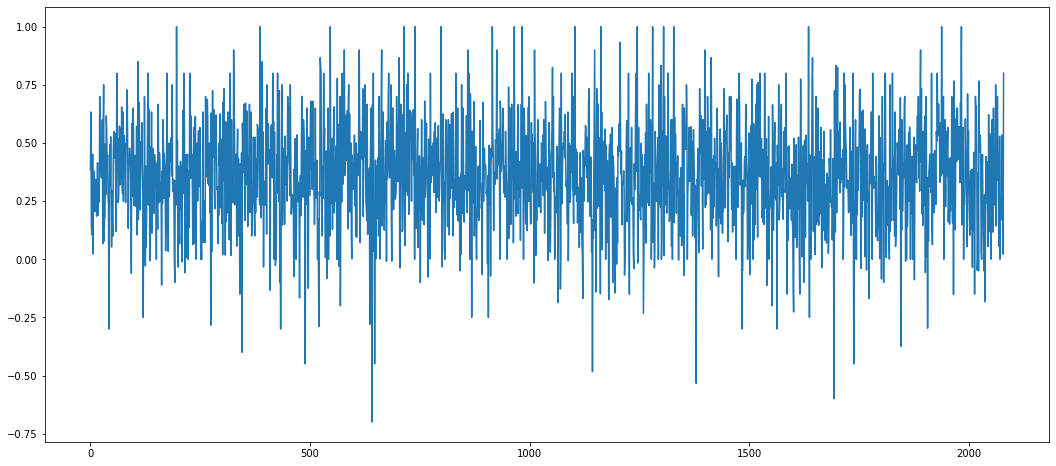

In [34]:
reviews['polarity'].plot(figsize=(18,8));

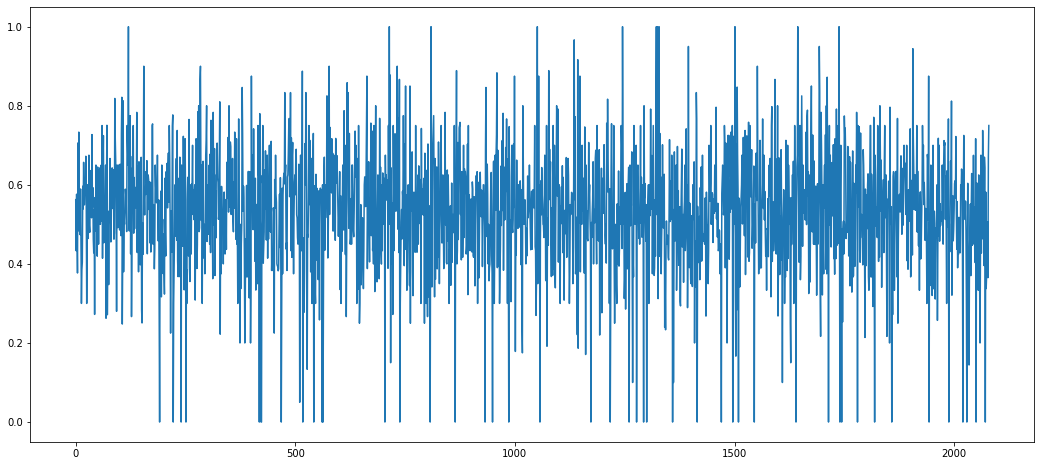

In [35]:
reviews['subjectivity'].plot(figsize=(18,8));